# K-Means
- Common clustering technique, helps to solve many problems efficiently.
- K-Means is an example of Hard Clustering, where every point belongs only to one cluster.

## Motivation Problem - *Pizza Parlour Study*

**Problem Statement** Given the list of locations of customers who frequently order Pizza we want to find out optimal locations of Pizza Parlours where they should be opened.

<img src="pizza1.png" alt="Pizza-1" style="width: 400px;"/>

**Step-1** : Initialise Pizza Parlour Centers randomly.
<img src="pizza2.png" alt="Pizza-2" style="width: 400px;"/>

**Step-2** : Assign each customer to its nearest Pizza Center.
<img src="pizza3.png" alt="Pizza-3" style="width: 400px;"/>

**Step-3** : Update the Center Location by taking mean of customers assigned to it.

**Step-4** : Repeat Steps 2 and 3 Until Convergence.

## K-Means Algorithm

**Input Data** : X = {x1,...,xN}

**Goal** : Partition the data among some K number of clusters. Let us assume K is known to us.

Let µk denote the center of Kth Cluster (uk will be vector)

So we need to ﬁnd an assignment of data points to clusters,
as well as a set of cluster centers{µk}, such that the sum of the squares 
of the distances of each data point to its closest cluster center µk, is a minimum. 




<img src="k-means.png" alt="Pizza-1" style="width: 600px;"/>


## Implementation



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [88]:
X, y = make_blobs(n_samples=500, n_features=2, random_state=6, centers=2)

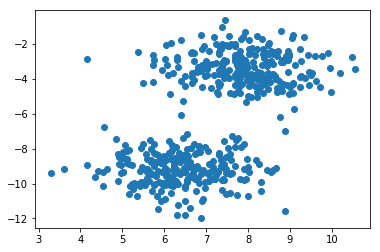

In [89]:
# plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [221]:
def plot_clusters(clusters):
    
    for cluster in clusters:
        points = np.array(cluster["points"])
        center = cluster["center"]
        if len(points) != 0:
            plt.scatter(points[:, 0], points[:, 1], c=cluster["color"], alpha=0.7)
        plt.scatter(center[0], center[1], c="black", marker="*")
    plt.show()

In [222]:
# plt.scatter(X[:, 0], X[:, 1])
# plot_clusters(clusters)

In [223]:
def distance(p1, p2):
    return np.sqrt(np.sum((p2-p1)**2))

def assign_points(clusters, X):
    
    
    for i in range(len(X)):
        distances = []
        
        for cluster in clusters:
            distances.append(distance(cluster["center"], X[i]))
        
        clusters[np.argmin(distances)]["points"].append(X[i])
    
def optimize_clusters(clusters):

    is_updated = False
    
    for cluster in clusters:    
        if len(cluster["points"]) < 1:
            continue
        new_center = np.mean(cluster["points"], axis=0)
        if np.any(new_center != cluster["center"]):
            cluster["center"] = new_center
            is_updated = True
        cluster["points"] = []
    
    return is_updated

In [228]:
def KMeans(k, X):
    clusters = []
    
    for i in range(k):
        clusters.append({"color": np.array([[np.random.rand(), np.random.rand(), np.random.rand()]]), "center": np.random.randint(0, 10, size=(2,)), "points":[]})

    while True:
        assign_points(clusters, X)
        plot_clusters(clusters)
        is_updated = optimize_clusters(clusters)
        if not is_updated:
            break
    return clusters

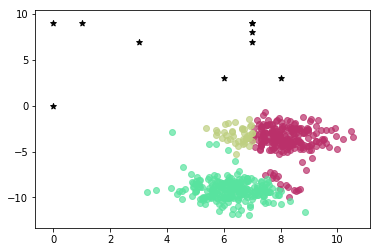

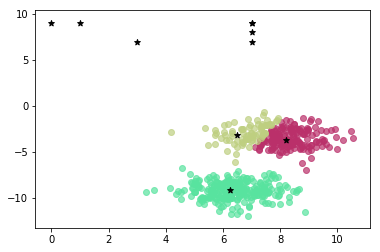

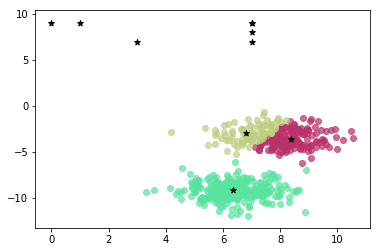

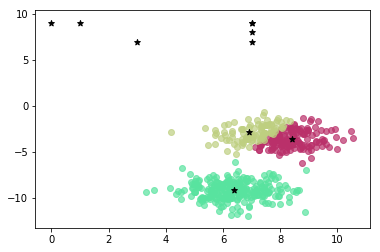

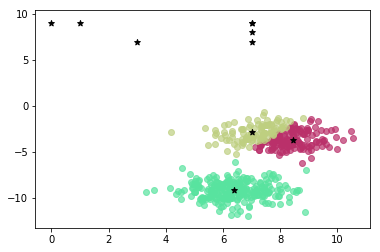

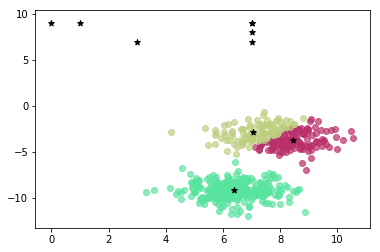

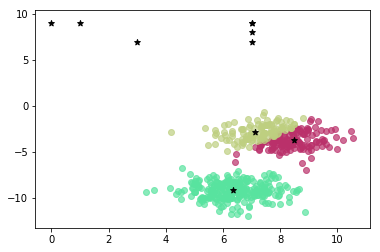

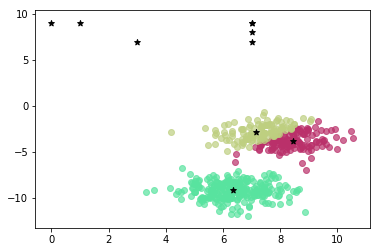

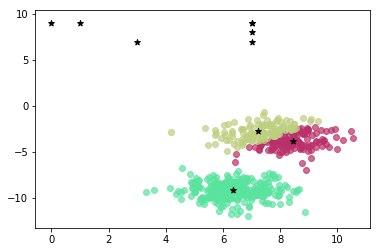

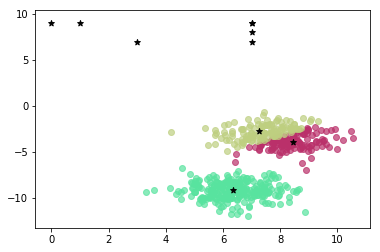

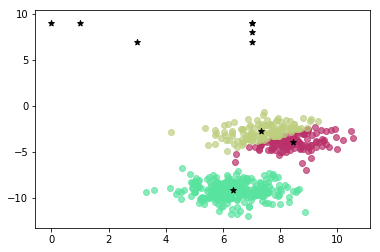

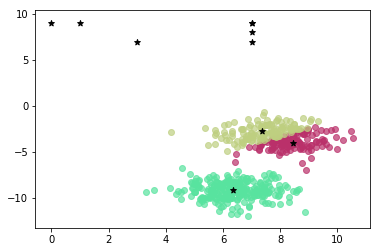

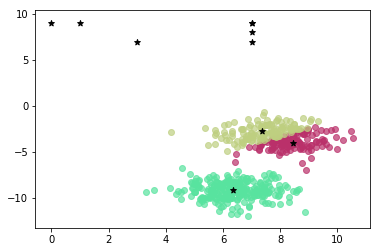

In [232]:
clusters = KMeans(10, X)
# plot_clusters(clusters)